In [217]:
#Libraries for data processing
import numpy as np 
import pandas as pd

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt

#Libraries for artificial neural network
import tensorflow as tf
#import tensorflow_probability as tfp
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Normalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler

In [218]:
#from logging import RootLogger
# Mount Google Drive
#from google.colab import drive # import drive from google colab

#root = "/content/drive"     # default location for the drive

#drive.mount(root)           # we mount the google drive at /content/drive

# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
#from os.path import join  

# path to your project on Google Drive
#my_google_drive_path = "MyDrive/StudentProject2023"

#project_path = join(root, my_google_drive_path)

In [219]:
train_data = pd.read_csv("/Users/martinbordeau/Downloads/StudentProject2023-main/processed_data/train_merged_data.csv", sep=";")

In [220]:
magic_numbers = [2, 8, 20, 28, 50, 82, 126, 184]

# Ajout de deux nouvelles colonnes pour stocker les distances à chaque nombre magique
train_data["Z_distance"] = None
train_data["N_distance"] = None

# Boucle pour calculer les distances et les stocker dans les nouvelles colonnes
for i, row in train_data.iterrows():
    z = row["Z"]
    n = row["N"]
    train_data.at[i, "Z_distance"] = min([abs(z - m) for m in magic_numbers])
    train_data.at[i, "N_distance"] = min([abs(n - m) for m in magic_numbers])

### We are adding more terms to our artificial neural network so it can perform better, these terms are the ones in the liquid drop model

In [221]:
train_data["Surf"] = np.power(train_data["A"],2/3)

train_data["Asym"] = ( (train_data["N"]-train_data["Z"])**2 ) / train_data["A"]

train_data["Coul"] = ( train_data["Z"]*(train_data["Z"]-1) ) / np.power(train_data["A"],1/3)

train_data["Pair"] = np.power(train_data["A"],-1/2)

train_data["Z_parity"] = np.power(-1,train_data["Z"])

train_data["N_parity"] = np.power(-1,train_data["N"])




In [222]:
#First inputs
target = train_data["ame_BE"]
n_input = train_data["N"]
z_input = train_data["Z"]

#Liquid drop inputs
surf_input = train_data["Surf"]
asym_input = train_data["Asym"]
coul_input = train_data["Coul"]
pair_input = train_data["Pair"]

#Other inputs that may help
z_parity_input = train_data["Z_parity"]
n_parity_input = train_data["N_parity"]
z_distance_input = train_data['Z_distance']  ######################################
n_distance_input = train_data['N_distance']

#Artificial networks work best when using data between 0 and 1 

#We rescale our first inputs
scaler = MinMaxScaler(feature_range=(0,1))

scaled_n = scaler.fit_transform(pd.Series.to_numpy(n_input).reshape(-1,1))
scaled_z = scaler.fit_transform(pd.Series.to_numpy(z_input).reshape(-1,1))

#We rescale our liquid drop inputs
scaled_coul = scaler.fit_transform(pd.Series.to_numpy(coul_input).reshape(-1,1))
scaled_surf = scaler.fit_transform(pd.Series.to_numpy(surf_input).reshape(-1,1))
scaled_asym = scaler.fit_transform(pd.Series.to_numpy(asym_input).reshape(-1,1))
scaled_pair = scaler.fit_transform(pd.Series.to_numpy(pair_input).reshape(-1,1))

#We rescale our other inputs
scaled_z_parity = scaler.fit_transform(pd.Series.to_numpy(z_parity_input).reshape(-1,1))
scaled_n_parity = scaler.fit_transform(pd.Series.to_numpy(n_parity_input).reshape(-1,1))
scaled_z_distance = scaler.fit_transform(pd.Series.to_numpy(z_distance_input).reshape(-1,1))#####################################
scaled_n_distance = scaler.fit_transform(pd.Series.to_numpy(n_distance_input).reshape(-1,1)) 
scaled_target = scaler.fit_transform(pd.Series.to_numpy(target).reshape(-1,1))

In [223]:
input1=keras.layers.Input(shape=(1,))
input2=keras.layers.Input(shape=(1,))
input3=keras.layers.Input(shape=(1,))
input4=keras.layers.Input(shape=(1,))
input5=keras.layers.Input(shape=(1,))
input6=keras.layers.Input(shape=(1,))
input7=keras.layers.Input(shape=(1,))##########################################
input8=keras.layers.Input(shape=(1,))
input9=keras.layers.Input(shape=(1,))
input10=keras.layers.Input(shape=(1,))


merged = keras.layers.Concatenate()([input1, input2, input3, input4, input5, input6, input7, input8])
#merged = keras.layers.Concatenate()([input1, input2])
dense1 = keras.layers.Dense(100, input_dim=8, activation="relu")(merged)
dense2 = keras.layers.Dense(100, activation="relu")(dense1)
dense3 = keras.layers.Dense(100, activation="relu")(dense2)
dense4 = keras.layers.Dense(100, activation="relu")(dense3)
dense5 = keras.layers.Dense(100, activation="relu")(dense4)
dense6 = keras.layers.Dense(100, activation="relu")(dense5)   ########################### nb of layers modified
dense7 = keras.layers.Dense(100, activation="relu")(dense6)
dense8 = keras.layers.Dense(100, activation="relu")(dense7)
dense9 = keras.layers.Dense(100, activation="relu")(dense8)
dense10 = keras.layers.Dense(100, activation="relu")(dense9)
output = keras.layers.Dense(1, activation="relu")(dense10)
model4 = keras.models.Model(([input1, input2, input3, input4, input5, input6, input7, input8]),output)

In [224]:
model4.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

Epoch 1/1000
104/104 - 0s - loss: 0.1006 - 488ms/epoch - 5ms/step
Epoch 2/1000
104/104 - 0s - loss: 0.0011 - 135ms/epoch - 1ms/step
Epoch 3/1000
104/104 - 0s - loss: 1.9401e-04 - 145ms/epoch - 1ms/step
Epoch 4/1000
104/104 - 0s - loss: 1.1919e-04 - 126ms/epoch - 1ms/step
Epoch 5/1000
104/104 - 0s - loss: 8.7286e-05 - 133ms/epoch - 1ms/step
Epoch 6/1000
104/104 - 0s - loss: 6.5663e-05 - 137ms/epoch - 1ms/step
Epoch 7/1000
104/104 - 0s - loss: 5.2512e-05 - 137ms/epoch - 1ms/step
Epoch 8/1000
104/104 - 0s - loss: 4.2150e-05 - 140ms/epoch - 1ms/step
Epoch 9/1000
104/104 - 0s - loss: 3.5725e-05 - 121ms/epoch - 1ms/step
Epoch 10/1000
104/104 - 0s - loss: 3.1359e-05 - 119ms/epoch - 1ms/step
Epoch 11/1000
104/104 - 0s - loss: 2.7234e-05 - 116ms/epoch - 1ms/step
Epoch 12/1000
104/104 - 0s - loss: 2.5747e-05 - 117ms/epoch - 1ms/step
Epoch 13/1000
104/104 - 0s - loss: 2.3293e-05 - 115ms/epoch - 1ms/step
Epoch 14/1000
104/104 - 0s - loss: 2.0042e-05 - 120ms/epoch - 1ms/step
Epoch 15/1000
104/104 -

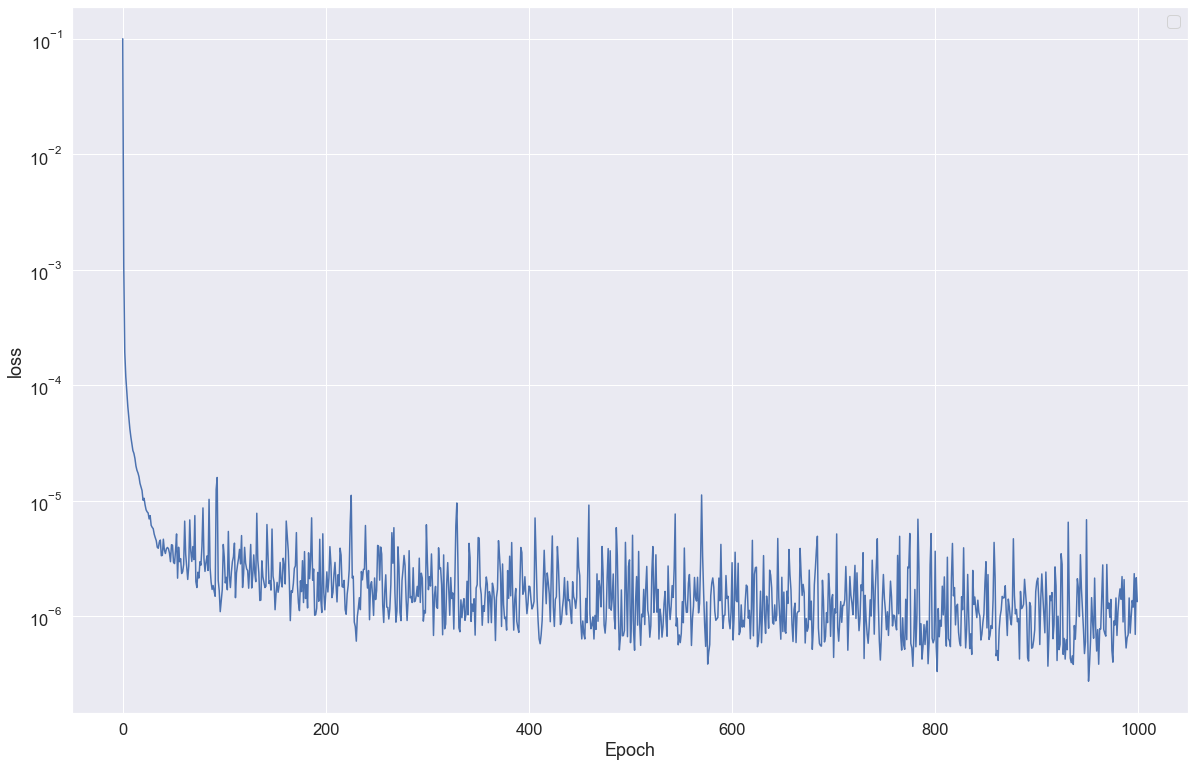

In [225]:
history4=model4.fit(x=(scaled_n,scaled_z,scaled_surf, scaled_coul, scaled_asym, scaled_pair, scaled_z_parity, scaled_n_parity), y=scaled_target, epochs=1000, shuffle=True, verbose=2)
#history4=model4.fit(x=(scaled_n,scaled_z), y=scaled_target, epochs=1000, shuffle=True, verbose=2) #######################################



plt.figure(figsize =(20,13))
plt.yscale('log')
plt.legend('labels')

plt.plot(history4.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()
#Be careful : loss is mean_squared_error, not RMS, and is calculated among 
#Rescaled variable, so it doesn't mean a lot

<AxesSubplot:xlabel='A', ylabel='Difference_BE_AME_ANN'>

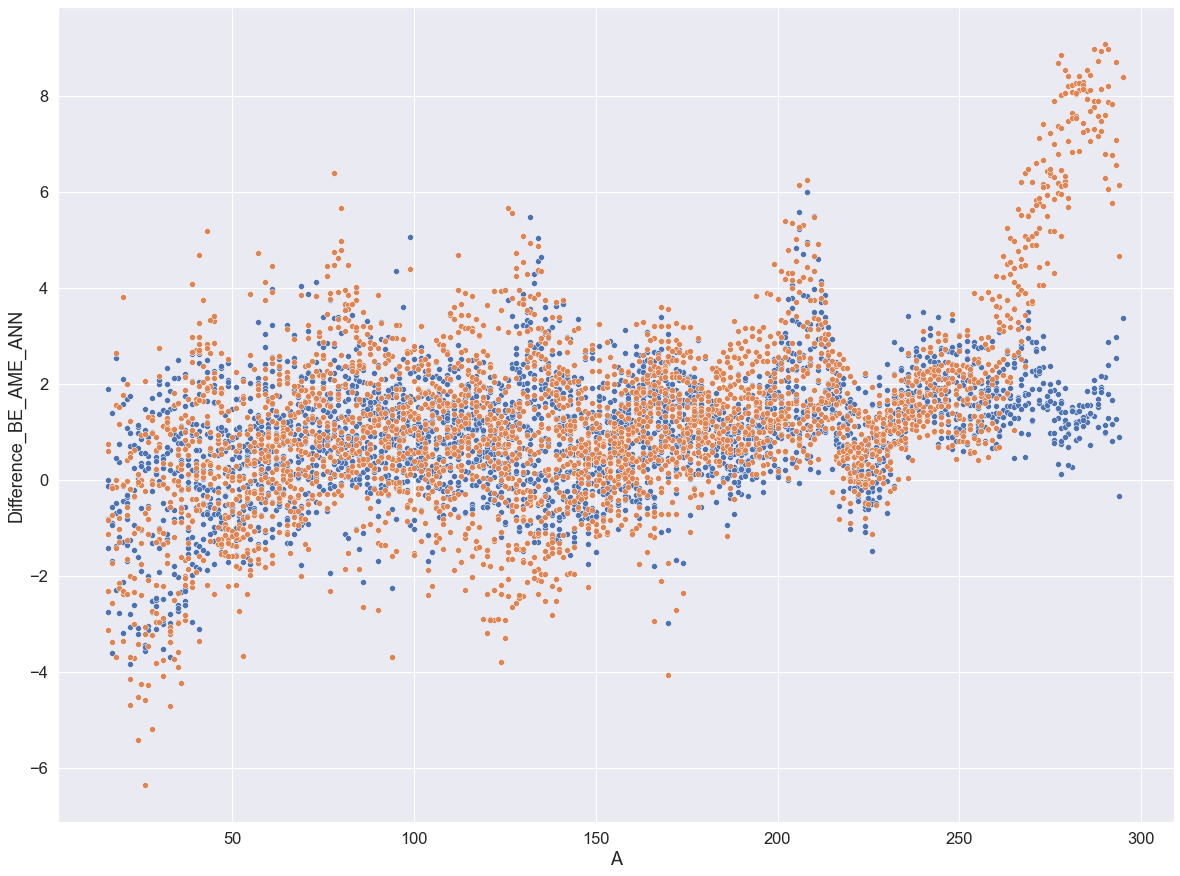

In [226]:
train_predictions = model4.predict(x=([scaled_n, scaled_z, scaled_surf, scaled_coul, scaled_asym, scaled_pair, scaled_z_parity, scaled_n_parity]), verbose=0)

train_rescaled_predictions = [(i - scaler.min_)/scaler.scale_ for i in train_predictions]


train_data["BE_Predictions"] = np.double(train_rescaled_predictions)
train_data["Difference_BE_AME_ANN"] = train_data["ame_BE"] - train_data["BE_Predictions"]
train_data["Difference_BE_DZ_ANN"] = train_data["dz_BE"] - train_data["BE_Predictions"]
train_data["Difference_BE_DZ_AME"] = train_data["dz_BE"] - train_data["ame_BE"]

plt.figure(figsize =(20,15))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for train data")

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=train_data, palette="rainbow_r")
sns.scatterplot(x="A",y="Difference_BE_DZ_ANN",data=train_data, palette="rainbow_r")

In [227]:
train_data

,Unnamed: 0,Z,N,dz_BE/A,dz_ME,A,dz_BE,dz_S1n,dz_S1p,dz_S2p,...,Surf,Asym,Coul,Pair,Z_parity,N_parity,BE_Predictions,Difference_BE_AME_ANN,Difference_BE_DZ_ANN,Difference_BE_DZ_AME
0,38,4.0,12.0,4.140832,59.759361,16.0,66.253311,0.582377,27.610998,47.988461,...,6.349604,4.000000,4.762203,0.250000,1.0,1.0,68.564562,0.000000,-2.311250,-2.311250
1,49,5.0,11.0,5.434849,38.272751,16.0,86.957581,-0.224247,21.286647,45.987557,...,6.349604,2.250000,7.937005,0.250000,-1.0,-1.0,86.218450,1.899206,0.739131,-1.160075
2,50,5.0,12.0,5.179702,45.246765,17.0,88.054931,1.097350,21.801620,49.412617,...,6.611489,2.882353,7.778222,0.242536,-1.0,1.0,88.194292,1.390059,-0.139361,-1.529420
3,51,5.0,13.0,4.922498,52.768120,18.0,88.604959,0.550029,23.893143,50.194323,...,6.868285,3.555556,7.631428,0.235702,-1.0,-1.0,87.039910,2.539441,1.565050,-0.974391
4,52,5.0,14.0,4.759754,59.009132,19.0,90.435329,1.830370,23.705462,52.380406,...,7.120367,4.263158,7.495124,0.229416,-1.0,1.0,88.925384,0.747674,1.509946,0.762272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,3373,117.0,176.0,7.112990,189.273193,293.0,2084.106181,7.416527,0.628611,3.493342,...,44.114201,11.880546,2043.405906,0.058421,-1.0,1.0,2077.559179,1.275821,6.547003,5.271181
3304,3374,117.0,177.0,7.109862,191.151123,294.0,2090.299525,6.193344,1.036107,3.916508,...,44.214517,12.244898,2041.086487,0.058321,-1.0,-1.0,2084.149465,0.898535,6.150060,5.251525
3305,3375,118.0,175.0,7.093525,194.194092,293.0,2078.402804,6.431873,1.713150,2.306591,...,44.114201,11.088737,2078.637042,0.058421,1.0,-1.0,2071.322672,2.531328,7.080132,4.548804
3306,3376,118.0,176.0,7.096009,194.441895,294.0,2086.226581,7.823777,2.120400,2.749011,...,44.214517,11.442177,2076.277633,0.058321,1.0,1.0,2081.572771,-0.346771,4.653810,5.000581


In [228]:
#validation_data = pd.read_csv(join(project_path,"processed_data/validation_merged_data.csv"), sep=";")
validation_data = pd.read_csv("/Users/martinbordeau/Downloads/StudentProject2023-main/processed_data/validation_merged_data.csv", sep=";")

validation_data["Z_distance"] = None
validation_data["N_distance"] = None

# Boucle pour calculer les distances et les stocker dans les nouvelles colonnes
for i, row in validation_data.iterrows():
    z = row["Z"]
    n = row["N"]
    validation_data.at[i, "Z_distance"] = min([abs(z - m) for m in magic_numbers])
    validation_data.at[i, "N_distance"] = min([abs(n - m) for m in magic_numbers])

validation_data["Surf"] = np.power(validation_data["A"], 2/3)
validation_data["Asym"] = ( (validation_data["N"]-validation_data["Z"])**2 ) / validation_data["A"]
validation_data["Coul"] =  ( validation_data["Z"]*(validation_data["Z"]-1) ) / np.power(validation_data["A"],1/3)
validation_data["Pair"] = np.power(validation_data["A"],-1/2)
validation_data["Z_parity"] = np.power(-1,validation_data["Z"])
validation_data["N_parity"] = np.power(-1,validation_data["N"])




test_target = validation_data["ame_BE"]
test_n_input = validation_data["N"]
test_z_input = validation_data["Z"]
test_coul_input = validation_data["Coul"]
test_surf_input = validation_data["Surf"]
test_asym_input = validation_data["Asym"]
test_pair_input = validation_data["Pair"]
test_z_parity_input = validation_data["Z_parity"]
test_n_parity_input = validation_data["N_parity"]
test_z_distance_input = validation_data['Z_distance']
test_n_distance_input = validation_data['N_distance']


test_scaled_n = scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z = scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_coul = scaler.fit_transform(pd.Series.to_numpy(test_coul_input).reshape(-1,1))
test_scaled_surf = scaler.fit_transform(pd.Series.to_numpy(test_surf_input).reshape(-1,1))
test_scaled_asym = scaler.fit_transform(pd.Series.to_numpy(test_asym_input).reshape(-1,1))
test_scaled_pair = scaler.fit_transform(pd.Series.to_numpy(test_pair_input).reshape(-1,1))
test_scaled_z_parity = scaler.fit_transform(pd.Series.to_numpy(test_z_parity_input).reshape(-1,1))
test_scaled_n_parity = scaler.fit_transform(pd.Series.to_numpy(test_n_parity_input).reshape(-1,1))
test_scaled_z_distance = scaler.fit_transform(pd.Series.to_numpy(test_z_distance_input).reshape(-1,1))
test_scaled_n_distance = scaler.fit_transform(pd.Series.to_numpy(test_n_distance_input).reshape(-1,1))
test_scaled_target = scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))


6/6 [==============================] - 0s 1ms/step


<AxesSubplot:xlabel='A', ylabel='Difference_BE_AME_ANN'>

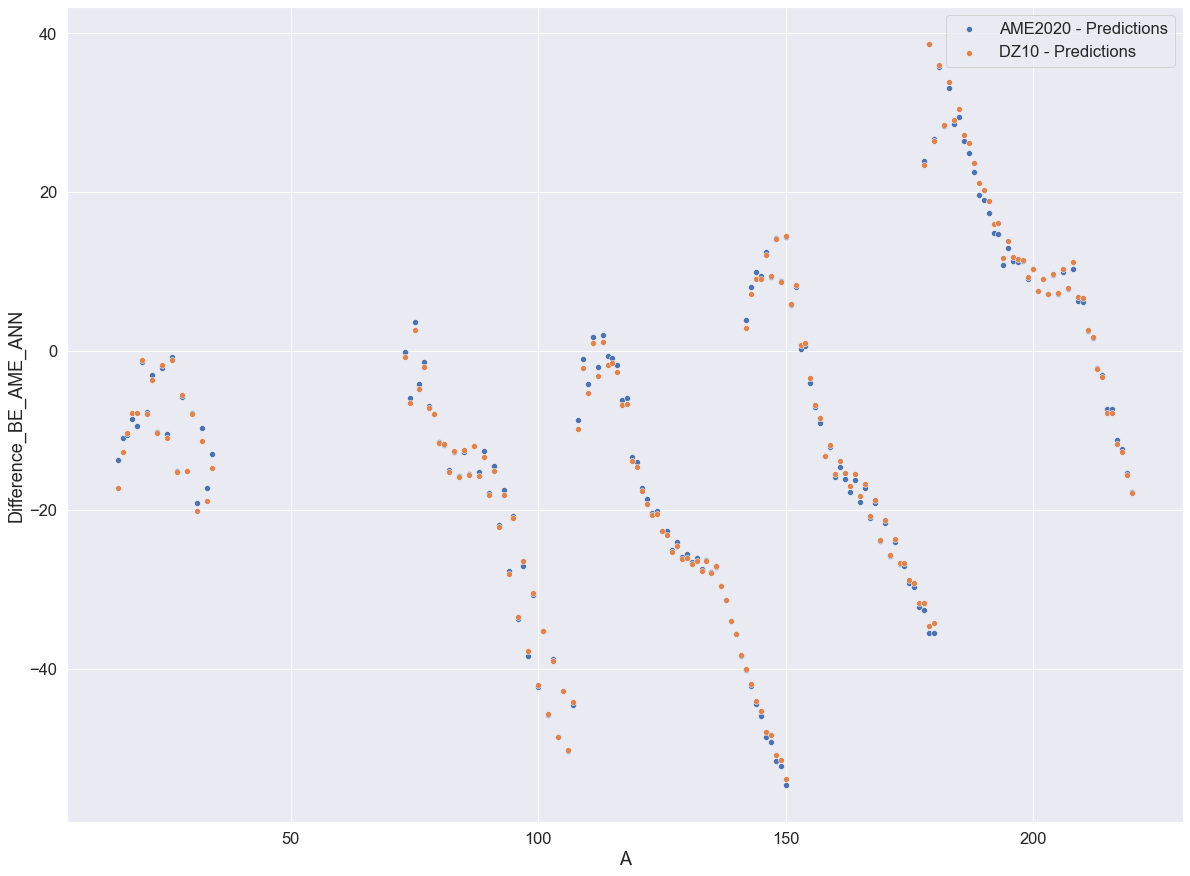

In [229]:
validation_predictions = model4.predict(x=([test_scaled_n,test_scaled_z, test_scaled_surf, test_scaled_coul, test_scaled_asym, test_scaled_pair, test_scaled_z_parity, test_scaled_n_parity]))

validation_rescaled_predictions = [ (i - scaler.min_)/scaler.scale_ for i in validation_predictions]

validation_data["BE_Predictions"] = np.double(validation_rescaled_predictions)
validation_data["Difference_BE_AME_ANN"] = validation_data["ame_BE"] - validation_data["BE_Predictions"]
validation_data["Difference_BE_DZ_ANN"] = validation_data["dz_BE"] - validation_data["BE_Predictions"]
validation_data["Difference_BE_DZ_AME"] = validation_data["dz_BE"] - validation_data["ame_BE"]


plt.figure(figsize =(20,15))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=validation_data, palette="rainbow_r", label="AME2020 - Predictions")
sns.scatterplot(x="A",y="Difference_BE_DZ_ANN",data=validation_data, palette="rainbow_r", label="DZ10 - Predictions")

In [230]:
validation_data

,Unnamed: 0,Z,N,dz_BE/A,dz_ME,A,dz_BE,dz_S1n,dz_S1p,dz_S2p,...,Surf,Asym,Coul,Pair,Z_parity,N_parity,BE_Predictions,Difference_BE_AME_ANN,Difference_BE_DZ_ANN,Difference_BE_DZ_AME
0,0,10.0,5.0,4.630573,43.788612,15.0,69.458592,21.641046,-2.558083,-6.087871,...,6.082202,1.666667,36.493212,0.258199,1.0,-1.0,86.719591,-13.688664,-17.260999,-3.572335
1,1,10.0,6.0,5.974043,25.733887,16.0,95.584694,26.126102,0.159801,-2.359117,...,6.349604,1.000000,35.716524,0.250000,1.0,1.0,108.294682,-10.963838,-12.709988,-1.746149
2,2,10.0,7.0,6.661270,16.148369,17.0,113.241584,17.656890,1.831916,1.469149,...,6.611489,0.529412,35.002001,0.242536,1.0,-1.0,123.497931,-10.609446,-10.256347,0.353100
3,3,10.0,8.0,7.388419,4.469788,18.0,132.991545,19.749960,4.005016,5.087706,...,6.868285,0.222222,34.341427,0.235702,1.0,1.0,140.736003,-8.593364,-7.744458,0.848906
4,4,10.0,9.0,7.654311,0.100800,19.0,145.431912,12.440368,5.861557,12.615262,...,7.120367,0.052632,33.728056,0.229416,1.0,-1.0,153.255573,-9.476054,-7.823661,1.652394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,82.0,134.0,7.737465,7.972778,216.0,1671.292522,4.905350,9.645773,17.716003,...,36.000000,12.518519,1107.000000,0.068041,1.0,1.0,1679.152361,-7.312361,-7.859839,-0.547478
176,176,82.0,135.0,7.716921,12.764770,217.0,1674.571929,3.279407,9.541305,18.036416,...,36.111026,12.944700,1105.296920,0.067884,1.0,-1.0,1686.260132,-11.237132,-11.688203,-0.451071
177,177,82.0,136.0,7.703561,16.031860,218.0,1679.376261,4.804332,9.970256,18.377448,...,36.221881,13.376147,1103.604273,0.067729,1.0,1.0,1692.036837,-12.346837,-12.660576,-0.313739
178,178,82.0,137.0,7.682960,20.911377,219.0,1682.568144,3.191883,9.865297,18.709878,...,36.332566,13.812785,1101.921947,0.067574,1.0,-1.0,1698.187084,-15.391084,-15.618940,-0.227856


In [240]:
test_scaled_z

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.38888889],
       [0.388

In [232]:
rms_validation = np.sqrt(((validation_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(validation_data["Difference_BE_AME_ANN"]))

print('RMS AME:', rms_validation)

RMS AME: 22.451305160605564


In [233]:
rms_train = np.sqrt(((train_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(train_data["Difference_BE_AME_ANN"]))

print('RMS AME:', rms_train)

RMS AME: 1.5252570861399006


<AxesSubplot:xlabel='A', ylabel='Difference_BE_DZ_AME'>

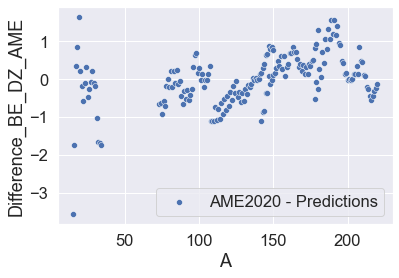

In [234]:
sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=validation_data, palette="rainbow_r", label="AME2020 - Predictions")

<AxesSubplot:xlabel='A', ylabel='BE(EXP) - BE(DZ10) (MeV)'>

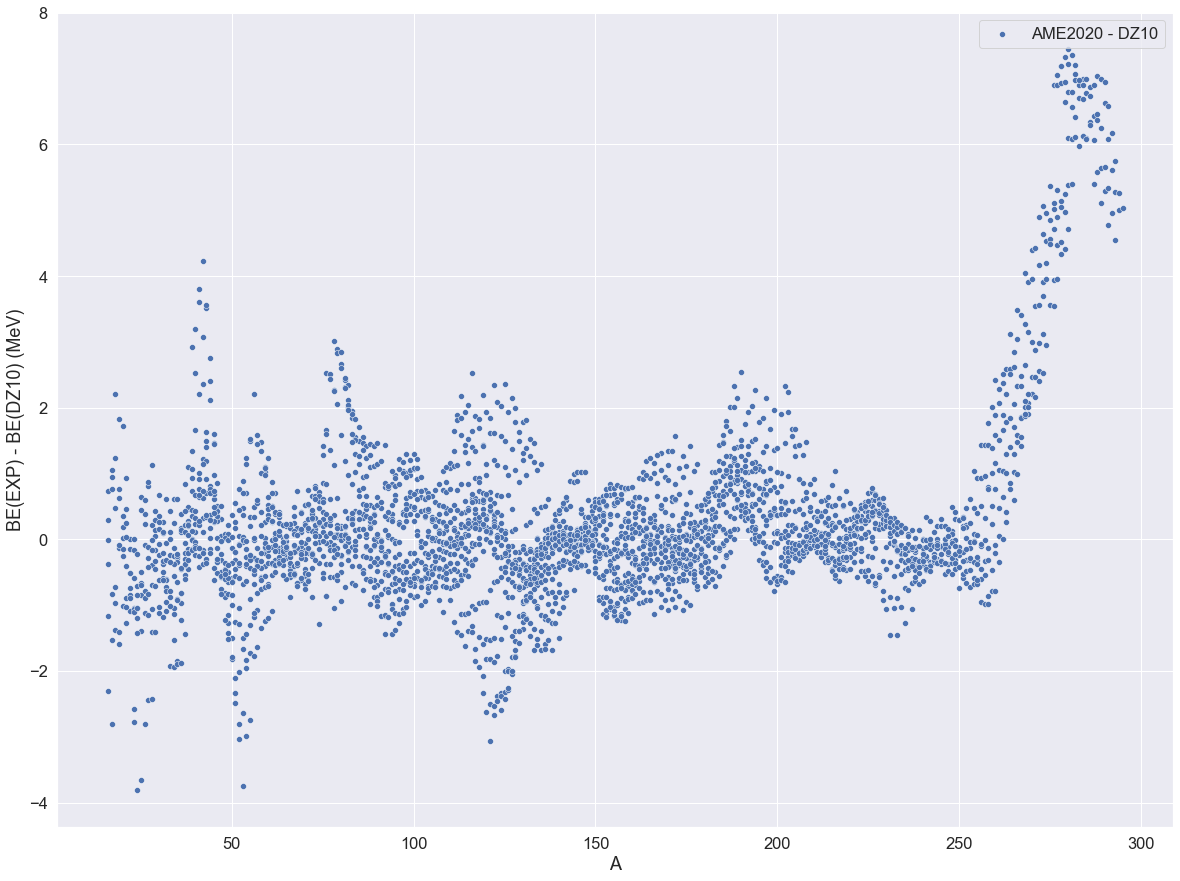

In [235]:
plt.figure(figsize =(20,15))
plt.ylabel("BE(EXP) - BE(DZ10) (MeV)")

sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=train_data, palette="rainbow_r", label="AME2020 - DZ10")


### Calculation S2p and S2n for predictions

In [236]:
train_data.sort_values(by=['Z'], ascending=True)
train_data['Prediction_S2p'] = train_data['BE_Predictions'] - train_data['BE_Predictions'].shift(2)

train_data = train_data.sort_values(by=['Z','A'], ascending=True)
train_data['Prediction_S2n'] = train_data['BE_Predictions'] - train_data['BE_Predictions'].shift(2)

<AxesSubplot:xlabel='A', ylabel='Difference_S2n_AME_Predictions'>

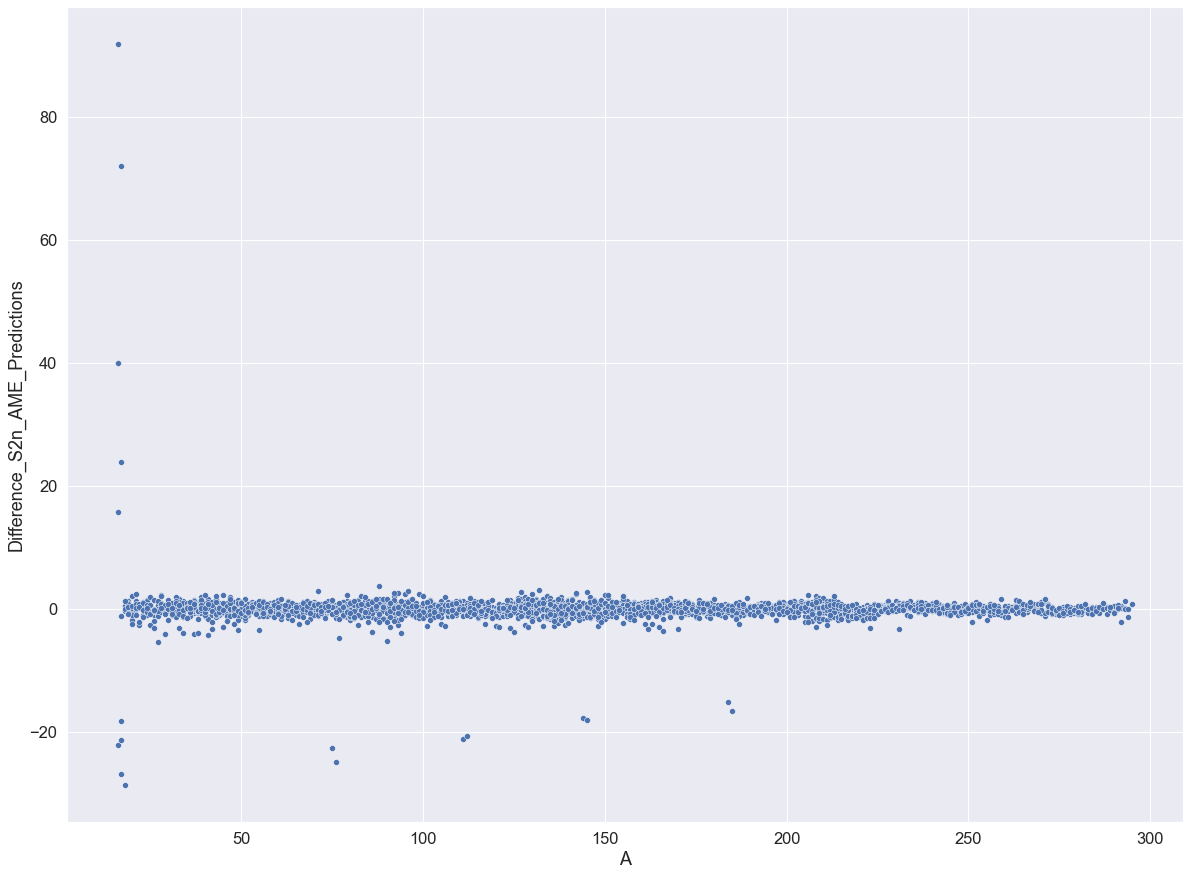

In [237]:
train_data["Difference_S2n_AME_Predictions"] = train_data["ame_S2n"] - train_data["Prediction_S2n"]


plt.figure(figsize =(20,15))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")

sns.scatterplot(x="A",y="Difference_S2n_AME_Predictions",data=train_data, palette="rainbow_r")